## Final Project Submission

Please fill out:
* Student name: Henry Kemboi
* Student pace: full time - remote
* Scheduled project review date/time: 
* Instructor name: Lucille / Asha
* Blog post URL:


### Project Overview

This project uses data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

### Business Problem
A company is expanding and they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. A dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters has been provided under the data folder named `AviationData.csv`. The task is to determine which aircraft are the lowest risk for the company to start this new business endeavor and then translate the findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## 1. Import Pandas Library - a data analysis and manipulation tool

In the cell below, import the `pandas` library using the standard alias `pd`, `numpy` as `np` and `matplotlib.pyplot` as `plt`.

In [61]:
# Import Pandas with the standard alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Data into a DataFrame Called `aviation_data`

The file path is `AviationData.csv` located within the data folder. Use pandas to read in the data from this CSV file and create a dataframe named `aviation_data` using the correct encoding.

In [9]:
aviation_data = pd.read_csv("./data/AviationData.csv", encoding='latin-1', low_memory=False)
aviation_data.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## 3. Filter Data to Find the Top and Least Number of Accidents by Aircraft Make

Let us grab the accident and make columns from the avition_data dataframe to analyze the number of accidents per make of aircraft. Before that we will first change all the columns to Title case. Since the dataset is very large, we only display the top and least 50 Makes.

In [47]:
#Convert all values in the Make column names to Title case

aviation_data["Make"]= aviation_data["Make"].str.title()

#Get the count of accidents per make
top_accidents_per_make = aviation_data['Make'].value_counts().head(50)
least_accidents_per_make = aviation_data['Make'].value_counts().tail(50)


In [48]:
# Convert the dictionary to a pandas series for easier plotting
top_accidents_per_make_series = pd.Series(top_accidents_per_make)
least_accidents_per_make_series = pd.Series(least_accidents_per_make)

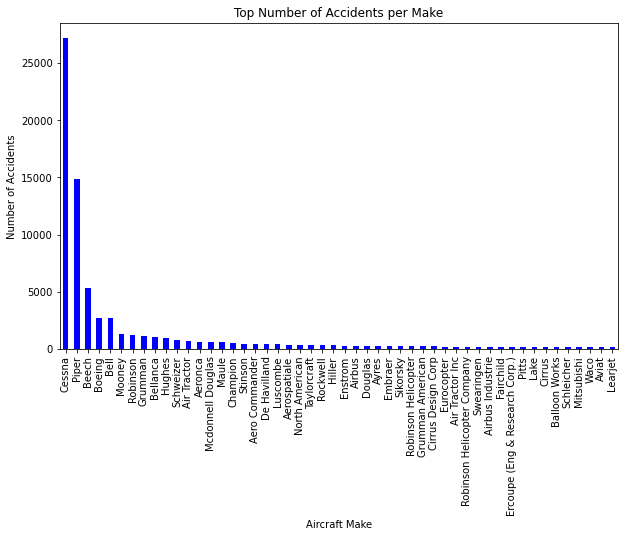

In [75]:
# Plotting the graph for top accidents per make
plt.figure(figsize=(10, 6))
top_accidents_per_make_series.plot(kind='bar', color='blue')
plt.title('Top Number of Accidents per Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
#plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
#plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

Let us now show the aircraft makes with the least accidents.

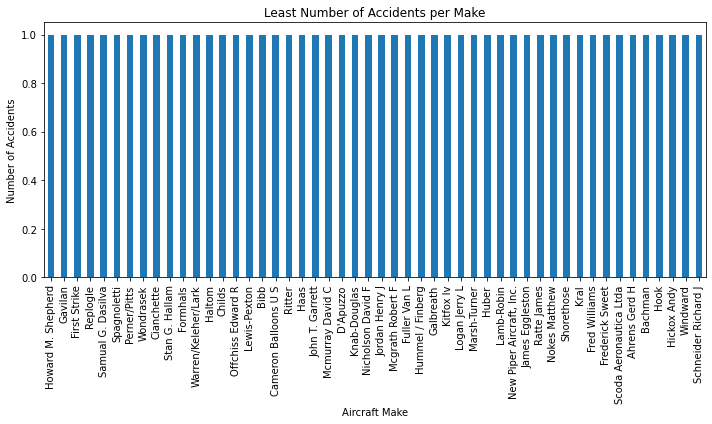

In [55]:
# Plotting the graph for least accidents per make
plt.figure(figsize=(10, 6))
least_accidents_per_make_series.plot(kind='bar')
plt.title('Least Number of Accidents per Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

In [73]:
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Weather
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,unk
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,unk
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,imc
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,imc
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,vmc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,vmc
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [72]:
aviation_data["Weather"] = aviation_data["Weather.Condition"].str.lower()
aviation_data.Weather.unique()

array(['unk', 'imc', 'vmc', nan], dtype=object)

## 4. Which city is the most dangerous to fly in

As the company ventures into aviation business, it is also important to know which is the most dangerous city to fly into.

In [69]:
most_dangerous_cities = aviation_data['Location'].value_counts().head(50)

Let us now convert the dictionary to a pandas series for easier plotting

In [64]:
# Convert the dictionary to a pandas series for easier plotting
most_dangerous_cities_series = pd.Series(most_dangerous_cities)

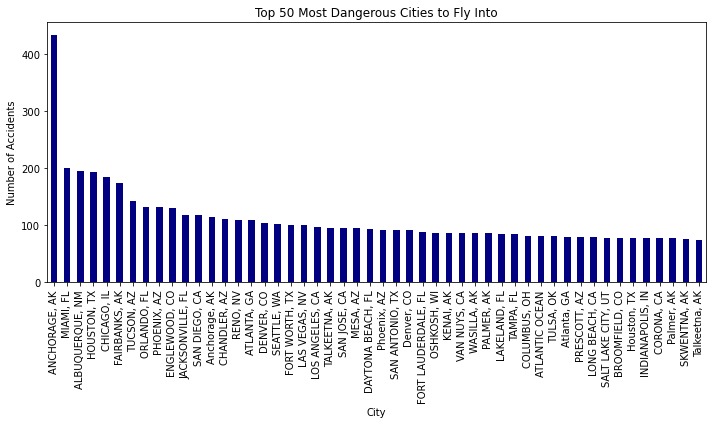

In [71]:
# Plotting the graph for least accidents per make
plt.figure(figsize=(10, 6))
most_dangerous_cities.plot(kind='bar', color='navy')
plt.title('Top 50 Most Dangerous Cities to Fly Into')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

From the data above, it is clear that the most dangerous city to fly into is Achorage, Arkansas followed by Miami, Florida. This is important information as the company ventures into the business.